# Wrangle and Analyze Data

## Goal

Wrangle WeRateDogs Twitter data to create interesting and trustworthy analysis and visualizations.

## Gather

1. The WeRateDogs Twitter archive - twitter_archive_enhanced.csv
2. Data via the Twitter API - tweet_json.txt
3. The tweet image predictions - https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [1]:
import numpy as np
import pandas as pd
import json
import requests
import io
% matplotlib inline

#### 1. Reading WeRateDogs Twitter archive file

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Reading JSON Data retrived via the Twitter API 

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
api_json = []
with open('tweet-json.txt') as json_file:  
    for line in json_file:
        s = json.loads(line)
        api_json.append({'tweet_id': int(s['id']),
                 'favorite_count': int(s['favorite_count']),
                 'retweet_count': int(s['retweet_count'])})
api_df = pd.DataFrame(api_json, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
api_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### 3. Image Predictions File 

In [4]:
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
predictions_df = pd.read_csv(file_url, sep='\t')
predictions_df.to_csv('image-predictions.tsv', sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess

### archive_df 

In [5]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
archive_df[archive_df.retweeted_status_id.isnull() == False].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [7]:
archive_df[archive_df.in_reply_to_status_id.isnull() == False].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [8]:
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
archive_df.groupby(['puppo','pupper','floofer','doggo']).count()['tweet_id']

puppo  pupper  floofer  doggo
None   None    None     None     1976
                        doggo      83
               floofer  None        9
                        doggo       1
       pupper  None     None      245
                        doggo      12
puppo  None    None     None       29
                        doggo       1
Name: tweet_id, dtype: int64

In [15]:
archive_df.query('rating_denominator != 10')[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50


In [16]:
archive_df[archive_df.name.str.match('([a-z])')]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [17]:
predictions_df['photo'] = predictions_df.jpg_url.str.extract('(http[s]?://[a-zA-Z0-9./_-]+.jpg)', expand=True)
predictions_df[predictions_df.photo.isnull()]['jpg_url'].unique()

array(['https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png',
       'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png'],
      dtype=object)

- Columns that we are interested which we needed later are 
 - tweet_id 
 - timestamp
 - rating_numerator
 - rating_denominator
 - doggo
 - floofer
 - pupper
 - puppo

- Total number of rows are 2356 and all these columns are non-nulls
- There are no duplicates
- Rating denominator, 10 is most commonly used. So, will convert the other rows to have a common denominator of 10
- By applying value_counts() we could see that doggo, floofer, pupper and puppo columns has either None or their value, so no need to clean.
- By applying group by, we could see that there are overlap between doggo, floofer, pupper and puppo columns i.e one row has values for both floofer and doggo, 12 rows have both pupper and doggo, etc.
- For some rows that don't have rating_denominator as 10, the text suggests that the ratings were wrongly extracted. So, we could correct them. (Note that excel was used here)
- lower case only name are not actual name names, so we need to clean them
- jpg_url has vaild jpg urls except for two values which are png 

### api_df 

In [18]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
api_df[api_df.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count


In [20]:
api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


All columns have no null values and there's no duplicate tweet_id. From the describe() we could see that both the count columns have valid values from 0 to positive integer

### predictions_df 

In [21]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
photo       2073 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [22]:
predictions_df[predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,photo


In [23]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


All columns have no null values and there's no duplicate tweet_id. From the describe() we could see that both the count columns have valid values between 0.0 to 1.0

## Quality
- On archive table, convert tweet_id column to string data type and timestamp column to datetime
- On api table, convert tweet_id column to string data type 
- On predictions table, convert tweet_id column to string data type
- Extract correct ratings from text column of archive table
- Remove invalid names in archive table
- Replace underscore '_' with space ' ' for predictions columns
- Trim Source column to have only the href attribute
- Delete retweeted rows i.e. rows with non-null values for retweeted_status_id and in_reply_to_status_id
- In the archive table, check the values of the columns doggo, floofer, pupper and puppo to true or false based on its value
- Update the values of columns doggo, floofer, pupper and puppo for rows manually

## Tidiness
- For archive table, combine the values for the columns doggo, floofer, pupper and puppo. For a tweet_id, if there are more than one stage then update them as multiple
- For archive table, convert and combine rating_numerator and rating_denominator columns to one column rating which is between 0.0 to 10.0

## Other changes
- Find the highest confidence among the three predictions and save it in a new column
- Merge all three tables to one

## Clean


In [24]:
archive_clean = archive_df.copy()
api_clean = api_df.copy()
predictions_clean = predictions_df.copy()

## Quality
#### Define
#### Change Column data types 
- Convert tweet_id column to string data type on all tables
- Change timestamp column data type to datetime

#### Code

In [25]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [27]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [28]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
photo       2073 non-null object
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


#### Define
Extract correct ratings from the text for archive table

#### Code

In [29]:
# first get ratings from text which has denominator of 10
archive_clean['rating_10'] = archive_clean.text.str.extract('([0-9]+\.?[0-9]*/10)', expand=True)
# get the first match from the text that follows a decimal.decimal/decimal pattern
archive_clean['rating_all'] = archive_clean.text.str.extract('([0-9]+\.?[0-9]*/[0-9]+)', expand=True)
# Take the denominator 10 rating. If it is na then take the other extracted rating
archive_clean['extracted_rating'] = archive_clean['rating_10'].fillna(archive_clean['rating_all'])
tmp = archive_clean.extracted_rating.str.split('/', n=1, expand=True)
archive_clean['rating_numerator'] = tmp[0].astype(float)
archive_clean['rating_denominator'] = tmp[1].astype(float)

#### Test

In [30]:
archive_clean[['extracted_rating', 'rating_numerator', 'rating_denominator']].head() 

,extracted_rating,rating_numerator,rating_denominator
0,13/10,13.0,10.0
1,13/10,13.0,10.0
2,12/10,12.0,10.0
3,13/10,13.0,10.0
4,12/10,12.0,10.0


In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating_10          

#### Define
Remove invalid name values. Replace names that are all in lower case to None

#### Code

In [32]:
archive_clean.loc[archive_clean[archive_clean.name.str.match(r'([a-z])')].index.values, 'name'] = 'None'

#### Test

In [33]:
archive_clean[archive_clean.name.str.match('([a-z])')]['name'].unique()

array([], dtype=object)

#### Define
Replace underscore '_' with space ' ' in the prediction columns

#### Code

In [34]:
predictions_clean.p1 = predictions_clean.p1.str.replace('_', ' ')
predictions_clean.p2 = predictions_clean.p1.str.replace('_', ' ')
predictions_clean.p3 = predictions_clean.p1.str.replace('_', ' ')

#### Test

In [35]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,photo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,miniature pinscher,0.154629,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


#### Define
Trim Source column to have only the href attribute

#### Code

In [36]:
archive_clean.source = archive_clean.source.str.extract('(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', expand=True)

#### Test

In [37]:
archive_clean.source.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

#### Define
Delete retweeted rows i.e. rows with non-null values for retweeted_status_id and in_reply_to_status_id

#### Code

In [38]:
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.isnull() == False].index.values, inplace=True)
archive_clean.drop(archive_clean[archive_clean.in_reply_to_status_id.isnull() == False].index.values, inplace=True)

#### Test

In [39]:
archive_clean[archive_clean.retweeted_status_id.isnull() == False].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_10,rating_all,extracted_rating


In [40]:
archive_clean[archive_clean.in_reply_to_status_id.isnull() == False].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_10,rating_all,extracted_rating


#### Define
Replace values of columns doggo, floofer, pupper and puppo to boolean 

#### Code

In [41]:
archive_clean.doggo = np.where(archive_clean.doggo == 'None', False, True)
archive_clean.floofer = np.where(archive_clean.floofer == 'None', False, True)
archive_clean.pupper = np.where(archive_clean.pupper == 'None', False, True)
archive_clean.puppo = np.where(archive_clean.puppo == 'None', False, True)

#### Test

In [42]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_10,rating_all,extracted_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,False,False,False,False,13/10,13/10,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,False,False,False,False,13/10,13/10,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,False,False,False,False,12/10,12/10,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,False,False,False,False,13/10,13/10,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,False,False,False,False,12/10,12/10,12/10


In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null bool
floofer                       2097 non-null bool
pupper                        2097 non-null bool
puppo                         2097 non-null bool
rating_10                     2085 

#### Define
Update Stage for rows having more than one manually
 - tweet_id 855851453814013952 is puppo
 - tweet_id 854010172552949760 is floofer
 - tweet_id 817777686764523521 is doggo
 - tweet_id 801115127852503040 is pupper
 - tweet_id 785639753186217984 is doggo 

#### Code

In [44]:
archive_clean.loc[archive_clean.query('tweet_id == "855851453814013952"').index.values, 'doggo'] = False
archive_clean.loc[archive_clean.query('tweet_id == "854010172552949760"').index.values, 'doggo'] = False
archive_clean.loc[archive_clean.query('tweet_id == "801115127852503040"').index.values, 'doggo'] = False
archive_clean.loc[archive_clean.query('tweet_id == "817777686764523521" | tweet_id == "785639753186217984"').index.values, 'pupper'] = False 

#### Test

In [45]:
archive_clean.query('tweet_id == "855851453814013952" | tweet_id == "854010172552949760" | tweet_id == "801115127852503040" | tweet_id == "817777686764523521" | tweet_id == "785639753186217984"')[['tweet_id','doggo', 'floofer', 'pupper', 'puppo', 'text']] 

,tweet_id,doggo,floofer,pupper,puppo,text
191,855851453814013952,False,False,False,True,Here's a puppo participating in the #ScienceMa...
200,854010172552949760,False,True,False,False,"At first I thought this was a shy doggo, but i..."
460,817777686764523521,True,False,False,False,"This is Dido. She's playing the lead role in ""..."
575,801115127852503040,False,False,True,False,This is Bones. He's being haunted by another d...
705,785639753186217984,True,False,False,False,This is Pinot. He's a sophisticated doggo. You...


## Tidiness
#### Define
For archive_df, convert the values for the columns doggo, floofer, pupper, puppo to as either 0 for None or 1 based on its content and combine it to a new column stage

#### Code

In [46]:
archive_clean['none'] = False
archive_clean['stage'] = archive_clean[['none','doggo', 'floofer', 'pupper', 'puppo']].idxmax(axis=1) 

In [47]:
archive_clean['all'] = archive_clean.doggo.astype(int) + archive_clean.floofer.astype(int) + archive_clean.pupper.astype(int) + archive_clean.puppo.astype(int) 
archive_clean.loc[archive_clean.query('all > 1').index.values, 'stage'] = 'multiple'

#### Test

In [48]:
archive_clean[['all','none','doggo', 'floofer', 'pupper', 'puppo','stage']].sample(5)

,all,none,doggo,floofer,pupper,puppo,stage
1292,0,False,False,False,False,False,none
941,0,False,False,False,False,False,none
1965,0,False,False,False,False,False,none
1944,0,False,False,False,False,False,none
1093,0,False,False,False,False,False,none


In [49]:
archive_clean[['tweet_id','all','none','doggo', 'floofer', 'pupper', 'puppo','stage', 'text']].query('all > 1')

,tweet_id,all,none,doggo,floofer,pupper,puppo,stage,text
531,808106460588765185,2,False,True,False,True,False,multiple,Here we have Burke (pupper) and Dexter (doggo)...
733,781308096455073793,2,False,True,False,True,False,multiple,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
889,759793422261743616,2,False,True,False,True,False,multiple,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,751583847268179968,2,False,True,False,True,False,multiple,Please stop sending it pictures that don't eve...
1063,741067306818797568,2,False,True,False,True,False,multiple,This is just downright precious af. 12/10 for ...
1113,733109485275860992,2,False,True,False,True,False,multiple,"Like father (doggo), like son (pupper). Both 1..."


#### Define
For archive_df, convert and combine rating_numerator and rating_denominator columns to one column rating with meaningful value

#### Code

In [50]:
archive_clean['rating'] = round(10.0 * archive_clean.rating_numerator / archive_clean.rating_denominator, 2)

#### Test

In [51]:
archive_clean.query('10 != rating_denominator')[['tweet_id', 'rating_numerator', 'rating_denominator', 'rating']].tail()

,tweet_id,rating_numerator,rating_denominator,rating
1351,704054845121142784,60.0,50.0,12.0
1433,697463031882764288,44.0,40.0,11.0
1635,684222868335505415,121.0,110.0,11.0
1779,677716515794329600,144.0,120.0,12.0
1843,675853064436391936,88.0,80.0,11.0


#### Define
Find the highest confidence among the three predictions and save it in a new column. If the prediction is not a dog then mark it as None.

#### Code

In [52]:
predictions_clean['breed'] = np.where(predictions_clean.p1_conf > predictions_clean.p2_conf, \
                           np.where(predictions_clean.p1_conf > predictions_clean.p3_conf, \
                                    np.where(predictions_clean.p1_dog == True, predictions_clean.p1, None), \
                                    np.where(predictions_clean.p3_dog == True, predictions_clean.p3, None)) ,\
                           np.where(predictions_clean.p2_conf > predictions_clean.p3_conf, \
                                    np.where(predictions_clean.p2_dog == True, predictions_clean.p2, None), \
                                    np.where(predictions_clean.p3_dog == True, predictions_clean.p3, None)) )

#### Test

In [53]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,photo,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,miniature pinscher,0.154629,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


#### Define
Merge all three tables to one

#### Code

In [54]:
archive_new = archive_clean[['tweet_id','timestamp','source','text','expanded_urls','rating','name','stage']]
master = pd.merge(archive_new, api_clean, how='outer', on='tweet_id')
master = pd.merge(master, predictions_clean, how='outer', on='tweet_id')

#### Test

In [55]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id          2356 non-null object
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
rating            2097 non-null float64
name              2097 non-null object
stage             2097 non-null object
favorite_count    2354 non-null float64
retweet_count     2354 non-null float64
jpg_url           2075 non-null object
img_num           2075 non-null float64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null object
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null object
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null object
photo             2073 non-null object
breed             15

- favorite_count and retweet_count have two null values in the dataframe which needs to be deleted. 
- Breed has lot of null values which can be filled with 'none' value

In [56]:
master.dropna(subset=['favorite_count', 'retweet_count'], inplace=True)
master.breed.fillna('none', inplace=True)

In [57]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 23 columns):
tweet_id          2354 non-null object
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
rating            2097 non-null float64
name              2097 non-null object
stage             2097 non-null object
favorite_count    2354 non-null float64
retweet_count     2354 non-null float64
jpg_url           2073 non-null object
img_num           2073 non-null float64
p1                2073 non-null object
p1_conf           2073 non-null float64
p1_dog            2073 non-null object
p2                2073 non-null object
p2_conf           2073 non-null float64
p2_dog            2073 non-null object
p3                2073 non-null object
p3_conf           2073 non-null float64
p3_dog            2073 non-null object
photo             2071 non-null object
breed             23

## Store

In [58]:
master.to_csv('twitter_archive_master.csv')

## Analysis

#### 1. Popularity among different stages (stage vs rating, favorite_count, retweet_count)

In [59]:
stage_analysis = master[['stage', 'rating', 'favorite_count', 'retweet_count']].groupby('stage').mean()
stage_analysis['count'] = master[['stage', 'tweet_id']].groupby('stage').count()
stage_analysis = stage_analysis.sort_values('rating')
stage_analysis

,rating,favorite_count,retweet_count,count
stage,,,,
pupper,10.739955,7257.527027,2485.837838,222
multiple,10.833333,14017.333333,5010.833333,6
none,11.769336,8605.789324,2659.643384,1761
floofer,11.800000,11674.900000,4083.600000,10
doggo,11.837838,17850.945946,6507.986486,74
puppo,12.041667,22715.125000,7124.875000,24


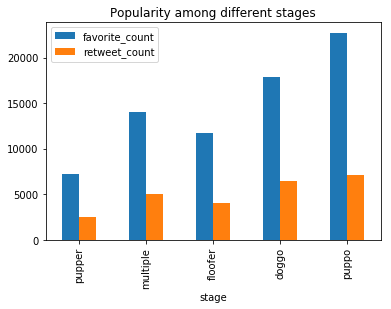

In [60]:
stage_analysis.drop('none', inplace=True)
stage_analysis[['favorite_count', 'retweet_count']].plot(kind='bar', title='Popularity among different stages');

#### 2. Popularity among different breeds (breed vs rating, favorite_count, retweet_count)

In [61]:
breed_analysis = master[['breed', 'rating', 'favorite_count', 'retweet_count']].groupby('breed').mean()
breed_analysis['count'] = master[['breed', 'tweet_id']].groupby('breed').count()
breed_analysis = breed_analysis.sort_values('count', ascending=False).head(11).sort_values('rating')
breed_analysis

,rating,favorite_count,retweet_count,count
breed,,,,
pug,10.240741,5617.947368,1979.473684,57
Chihuahua,10.692308,8149.891566,3665.277108,83
toy poodle,11.054054,6472.974359,2472.256410,39
Labrador retriever,11.127660,11238.500000,4273.430000,100
Pomeranian,11.151316,7871.421053,2803.105263,38
cocker spaniel,11.296296,10527.500000,4097.966667,30
Pembroke,11.443182,11304.034091,3185.988636,88
chow,11.609756,9187.295455,2956.363636,44
Samoyed,11.700000,12627.697674,4940.418605,43


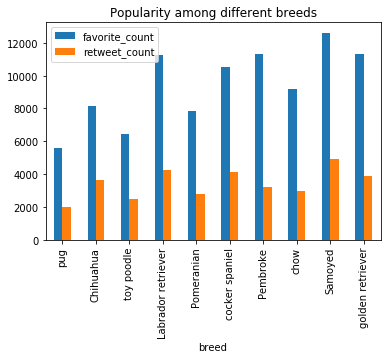

In [62]:
breed_analysis.drop('none', inplace=True)
breed_analysis[['favorite_count', 'retweet_count']].plot(kind='bar', title='Popularity among different breeds');

#### 3. Popularity over time (timestamp vs rating, favorite_count, retweet_count) 

In [63]:
time_analysis = master[['favorite_count', 'retweet_count']]
time_analysis.index = master['timestamp']
time_analysis = time_analysis.groupby(pd.Grouper(freq='M')).sum()
time_analysis

,favorite_count,retweet_count
timestamp,,
2015-11-30,367571.0,160952.0
2015-12-31,1332903.0,581632.0
2016-01-31,764848.0,304553.0
2016-02-29,499740.0,188185.0
2016-03-31,619372.0,233415.0
2016-04-30,280103.0,97674.0
2016-05-31,366741.0,132613.0
2016-06-30,845725.0,371879.0
2016-07-31,714892.0,271731.0


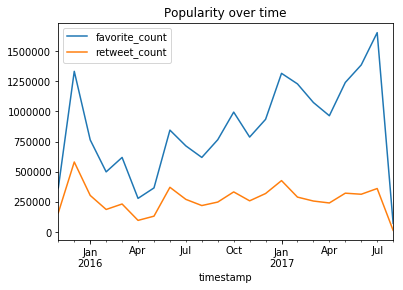

In [64]:
time_analysis.plot(kind='line', title='Popularity over time');

#### 4. Correlation between rating and favorite_count and retweet_count

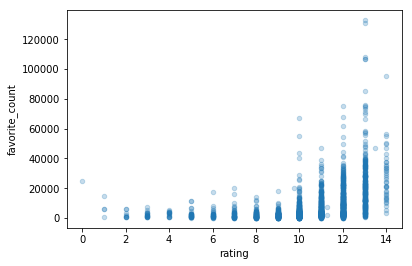

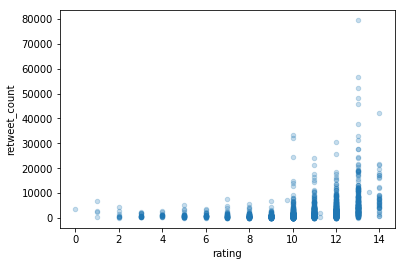

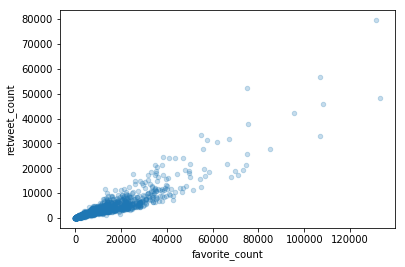

In [65]:
corr = master.query('rating < 20')
corr.plot(x='rating',y='favorite_count',kind='scatter', alpha = 0.25);
corr.plot(x='rating',y='retweet_count',kind='scatter', alpha = 0.25);
corr.plot(x='favorite_count',y='retweet_count',kind='scatter', alpha = 0.25);